<H1 align="center"> Transferencia de calor en un paralelepípedo</H1>
<H6> Intengrantes:
        -Sebastian Molina
        -Felipe Saldias
        -Daniela Fábrega
        -Francisco González</H1>

## Planteamiento del problema

En el presente trabajo, basado en la tesis de la profesora Gladys Mansilla, se desea encontrar la distribución estacionaria de la temperatura T(x,y,z) en un dominio sujeto a las siguientes condiciones de frontera: 

$$
k_x\frac{\partial² T}{\partial x²} + k_y\frac{\partial² T}{\partial y²} + k_z\frac{\partial² T}{\partial z²} + Q = 0
$$

donde Q es la densidad de generación de calor por unidad de volumen y las k son constantes de conductividad con un valor de 0.5 [Watt/cm°C]

Para el ejercicio consideramos las siguientes condiciones de borde:

- Sobre una cara existe una temperatura impuesta de T=10°C
- Sobre la cara opuesta un flujo de calor constante g = 0,5 [Watt/cm²]
- Condición de borde en (x,0,z): $$\frac{\partial T}{\partial y} = 0.5$$ 

# ESPACIO PARA IMAGEN

## Resolución del problema

Para dar una solución al problema de forma computacional utilizamos Python, en donde el parametro <strong>h</strong> (paso en la malla homogénea) puede tomar valores dentro de un rango aceptable, entre 0 y 2, con la condicion de que la cantidad de intervalos que resultan al dividir este <strong>h</strong> por el tamaño de los lados (largo, ancho y alto) debe ser par.

Pero partiendo desde el principio, nuestra primera solución fue de manera escrita, ya que sin esto se nos hubiese hecho muy complejo hacerlo en el computador. A continuación presentaremos el planteamiento escrito que finalmente nos llevó a la solución computacional: 

### Procedimiento utilizado:

En esta oportunidad se explicará el procedimiento para la resolución del ejercicio con un paso H=1, pero este procedimiento puede ser extendido a subdivisiones mas pequeñas simplemente modificando el H en el codigo siempre y cuando este cumpla las condiciones ya mencionadas.

Lo primero a tener en cuenta para contextualizar es que el ejercicio se trata simplemente de resolver un sistema de ecuaciones de 45 x 45 provenientes de extender una ecuacion de 45 variables para cada uno de los puntos de la subdivision del paralelepipedo. De acuerdo con el contexto del problema es necesario crear estas ecuaciones de 3 maneras distintas: una para la placa (x,0,z), una para todos los nodos intermedios y una para la placa (x,4,z)

#### Primera placa (x,0,z):

Para esto consideramos la siguiente condición de borde: $$\frac{\partial T}{\partial y} = 0.5,$$
Basados en esto, desplegamos las siguiente ecuación general:  
$$
T_{i,j+1,k} -  T_{i,j,k}  = 0.5      
$$

Utilizamos diferencias finitas de primer orden de manera progresiva ya que contabamos con la condición de borde, entonces si la utilizabamos de manera regresiva obteníamos un dato que no nos interesaba, y si usabamos la centrada no íbamos a ocupar el dato que se nos entregó.

#### Placas intermedias ((x,1,z)(x,2,z)(x,3,z)):

Para este caso utilizamos la fórmula que se nos entregó de condiciones de frontera, desarrollandola a través de diferencias finitas de segundo orden en varias variables. De esto desplegamos la siguiente ecuación general:

$$
T_{i+1,j,k} - 6T_{i,j,k} + T_{i-1,j,k} +  T_{i,j+1,k} + T_{i,j-1,k} -  T_{i,j,k+1}  + T_{i,j,k-1} + {Q \over 0.5} = 0,
$$

donde Q será 0 o 1 dependiendo de la ubicación del punto a analizar. Recordamos nuevamente que estas fórmulas son basándonos en un h=1.

#### Tercera placa (x,4,z):

En este caso ya tenemos la temperatura en los puntos, por lo que se crean las ecuaciones igualando a la temperatura dada:


$$
T_{i,j,k} = 10
$$

Consideramos temperatura = 10.


In [81]:
# Invocamos la magia con una de las opciones
%matplotlib notebook
# Importamos la librería
import matplotlib as mpl
print(mpl.__version__)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d.axes3d import Axes3D
#print(sorted(mpl.style.available))
#plt.style.use('classic')
#print("Versión de pandas "+pd.__version__)

3.0.3


In [8]:
# en este bloque se calculan los puntos que contendra la malla 
# y se almacenan en una estructura de puntos*3
Largoy=4
Largox=2
Largoz=2
H=1
#H= float(input('Ingrese dato: '))
puntosx=(Largox/H)+1
puntosy=(Largoy/H)+1
puntosz=(Largoz/H)+1
puntos=puntosx*puntosy*puntosz
while ((puntos % 1) != 0):
    print ("ATENCIÓN: ingrese un paso valido.")
    H= float(input('Ingrese dato: '))
    puntos=((Largoy/H)+1)*((Largox/H)+1)*((Largoz/H)+1)
    puntosx=(Largox/H)+1
    puntosy=(Largoy/H)+1
    puntosz=(Largoz/H)+1
puntos=int(puntos)
x = [[H*x, H*y, H*z] for y in range(int(puntosy)) for z in range(int(puntosz)) for x in range(int(puntosx)) ]
l=np.array(x, dtype=np.float32)
puntos_ul=(puntosx*puntosz) # cantidad de puntos por placa
#l.ndim
#type(l)
#l[int(puntos-puntos_ul):int(puntos),0]

    



In [112]:
# A CONTINUACION SE LLEVA A CABO EL PROCEDIMIENTO PARA COMPLETAR LA MATRIZ DE COEFICIENTES DEL SISTEMA

matriz = np.zeros((puntos,puntos))
vectorb=np.zeros((puntos,1))
indice=0

for j in range(int(puntosy)):
    for k in range (int(puntosz)):
        for i in range(int(puntosx)):
            #print(i,j,k)
            if(j==0):
                un=i+k*puntosx+puntos_ul
                do=(i+k*puntosx)
                matriz[indice,int(un)]=1/H
                matriz[indice,int(do)]=-1/H
                vectorb[indice]=0.5
            
            if j<int(puntosy-1) and j!=0:
                # Se calcula el indice en el arreglo de los puntos vecinos del actual desde (i,j,k)--> valorlineal
                actual=i+k*puntosx+j*puntos_ul
                ymas=actual+puntos_ul
                ymenos=actual-puntos_ul
                xmas=actual+1
                xmenos=actual-1
                zmas=actual+puntosx
                zmenos=actual-puntosx
                # Se completa en la matriz los coeficientes de las variables pertenecientes a el valor actual
                matriz[indice,int(actual)]=-6
                # Se completa en la matriz los coeficientes de las variables pertenecientes a los vecinos en y
                matriz[indice,int(ymenos)]=1
                matriz[indice,int(ymas)]=1
                # Se completa en la matriz los coeficientes de las variables pertenecientes a los vecinos en x
                if(i!=puntosx-1): # Condicion de punto de borde
                    matriz[indice,int(xmas)]=1
                if(i!=0):
                    matriz[indice,int(xmenos)]=1
                # Se completa en la matriz los coeficientes de las variables pertenecientes a los vecinos en z
                if(k!=puntosz-1):
                    matriz[indice,int(zmas)]=1
                if(k!=0): 
                    matriz[indice,int(zmenos)]=1
                if(j>=int(puntosy/2)):
                    vectorb[indice]=-((H**2)/0.5)
            
            if j==puntosy-1:
                actual=i+k*puntosx+j*puntos_ul
                matriz[indice,int(actual)]=1
                vectorb[indice]=10
            indice=indice+1
solucion= np.linalg.inv(matriz).dot(vectorb) 
print("El vector solución es: \n")
print(pd.Series(np.squeeze(solucion),name="Solucion"))


El vector solución es: 

0      0.119222
1      0.363014
2      0.119222
3      0.363014
4      0.699982
5      0.363014
6      0.119222
7      0.363014
8      0.119222
9      0.619222
10     0.863014
11     0.619222
12     0.863014
13     1.199982
14     0.863014
15     0.619222
16     0.863014
17     0.619222
18     1.870080
19     2.376647
20     1.870080
21     2.376647
22     3.047852
23     2.376647
24     1.870080
25     2.376647
26     1.870080
27     3.847964
28     4.608853
29     3.847964
30     4.608853
31     5.580544
32     4.608853
33     3.847964
34     4.608853
35     3.847964
36    10.000000
37    10.000000
38    10.000000
39    10.000000
40    10.000000
41    10.000000
42    10.000000
43    10.000000
44    10.000000
Name: Solucion, dtype: float64


<IPython.core.display.Javascript object>


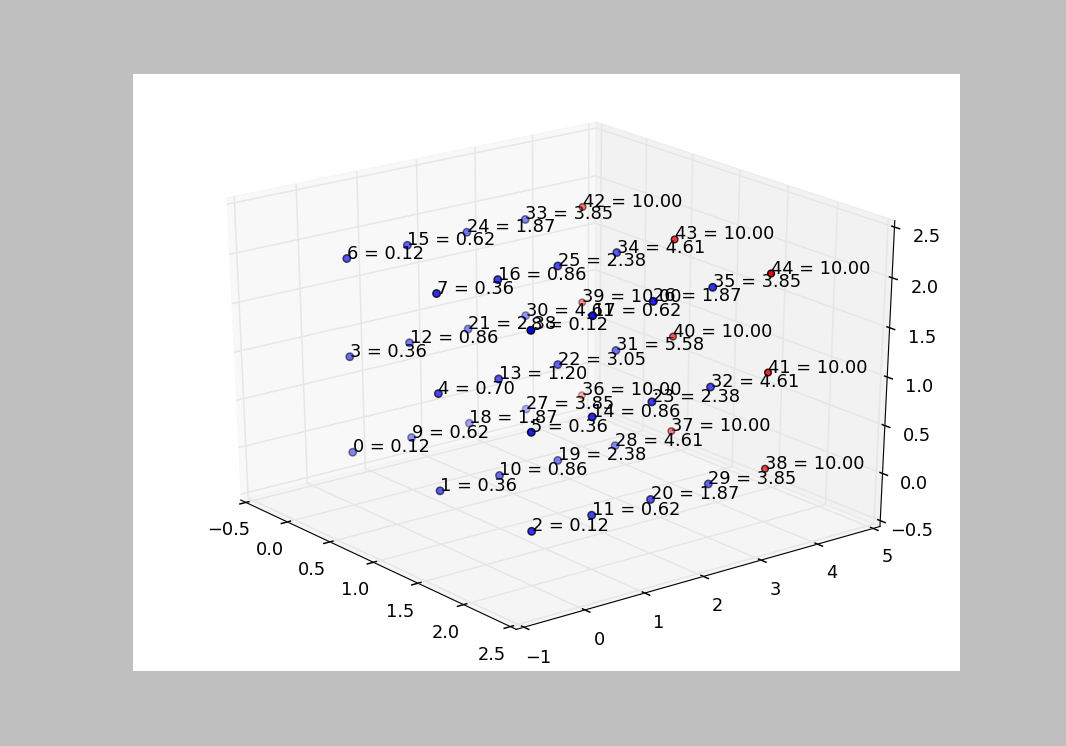

In [105]:
#Crea el gráfico de el parapipedo 

fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': '3d'})

ax.view_init(elev=21., azim=-61)
ax.scatter(l[0:int(puntos-puntos_ul),0],l[0:int(puntos-puntos_ul),1],l[0:int(puntos-puntos_ul),2], s=25)
ax.scatter(l[int(puntos-puntos_ul):int(puntos),0],l[int(puntos-puntos_ul):int(puntos),1],l[int(puntos-puntos_ul):int(puntos),2],c='red')
for i in range(puntos):
    label = '%i = %s' % (i ,'%.2f'%(solucion[i]))
    ax.text(x[i][0], x[i][1], x[i][2], label)   

